In [3]:
import sys
import json
import requests
import random
import PIL.Image
from IPython.display import Image, clear_output
from io import BytesIO

In [4]:
random.seed(420)

In [5]:
schools = ["columbia", "dartmouth", "yale", "princeton", "brown", "cornell", "upenn", "harvard"]

In [6]:
def get_school_json(school):
    with open(sys.path[0] + f'/../data/{school}/{school}_w_profiles_processed.json', 'r') as f:
        the_school = json.load(f)
    return the_school

Race:  
u: Unknown  
w: White  
a: API  
b: Black  
h: Hispanic  
n: Native  

Gender:  
u: Unknown  
m: Male  
f: Female  

In [7]:
dictionary = {'u': 'unknown', 'w': 'white', 'a': 'api', 'b': 'black', 'h': 'hispanic', 'n': 'native', 
              'm': 'male', 'f': 'female'}

In [228]:
def data_labeling(school, count):
    lst_len = len(school)
    for i in range(5):
        # get a random department
        ind = random.randint(0, lst_len-1)
        while school[ind].get('success') is not True:
            ind = random.randint(0, lst_len-1)
        department = school[ind]
        department.update({'labeled': True})
        
        # get a random profile
        profiles = department.get('profiles')
        profs_len = len(profiles)
        if profs_len < 10:       
            num_profs = min(3, profs_len)
        else:
            num_profs = min(10, int(profs_len/5))
            
        for j in range(0, num_profs):
            clear_output()
            prof_ind = random.randint(0, profs_len-1)
            prof = profiles[prof_ind]
            if prof.get('img') is None or 'race_labeled' in prof.keys():
                continue
            url = prof.get('img')
            try:
                response = requests.get(url)
                im = PIL.Image.open(BytesIO(response.content))
                display(im.resize((200, 250), PIL.Image.NEAREST))
                print(prof.get('name'))
            except:
                break
            race_gender = input("Race Gender: ")
            if race_gender == (''):
                continue
            race = dictionary.get(race_gender[:1].lower())
            gender = dictionary.get(race_gender[-1:].lower())
            count += 1
            prof.update({'race_labeled': race, 'gender_labeled': gender})
    return count

# Columbia

In [33]:
columbia = get_school_json('columbia')

In [34]:
count = 0

In [42]:
count = data_labeling(columbia, count)

In [48]:
with open(sys.path[0] + '/../data/columbia/columbia_w_profiles_labeled.json', 'w') as f:
    json.dump(columbia, f)

# Dartmouth

In [52]:
dartmouth = get_school_json('dartmouth')

In [53]:
count = 0

In [62]:
count = data_labeling(dartmouth, count)

In [66]:
with open(sys.path[0] + '/../data/dartmouth/dartmouth_w_profiles_labeled.json', 'w') as f:
    json.dump(dartmouth, f)

# Yale

In [67]:
yale = get_school_json('yale')

In [68]:
count = 0

In [77]:
count = data_labeling(yale, count)

In [80]:
with open(sys.path[0] + '/../data/yale/yale_w_profiles_labeled.json', 'w') as f:
    json.dump(yale, f)

# Princeton

In [81]:
princeton = get_school_json('princeton')

In [88]:
count = 0

In [98]:
count = data_labeling(princeton, count)

In [100]:
with open(sys.path[0] + '/../data/princeton/princeton_w_profiles_labeled.json', 'w') as f:
    json.dump(princeton, f)

# Brown

In [112]:
brown = get_school_json('brown')

In [113]:
count = 0

In [122]:
count = data_labeling(brown, count)

In [125]:
with open(sys.path[0] + '/../data/brown/brown_w_profiles_labeled.json', 'w') as f:
    json.dump(brown, f)

# Cornell

In [126]:
cornell = get_school_json('cornell')

In [127]:
count = 0

In [134]:
count = data_labeling(cornell, count)

In [136]:
with open(sys.path[0] + '/../data/cornell/cornell_w_profiles_labeled.json', 'w') as f:
    json.dump(cornell, f)

# UPenn

In [137]:
upenn = get_school_json('upenn')

In [138]:
count = 0

In [149]:
count = data_labeling(upenn, count)

In [151]:
with open(sys.path[0] + '/../data/upenn/upenn_w_profiles_labeled.json', 'w') as f:
    json.dump(upenn, f)

# Harvard

In [152]:
harvard = get_school_json('harvard')

In [153]:
count = 0

In [163]:
count = data_labeling(harvard, count)

In [165]:
with open(sys.path[0] + '/../data/harvard/harvard_w_profiles_labeled.json', 'w') as f:
    json.dump(harvard, f)

# Summary

In [166]:
def get_school_json_2(school):
    with open(sys.path[0] + f'/../data/{school}/{school}_w_profiles_labeled.json', 'r') as f:
        the_school = json.load(f)
    return the_school

In [169]:
num_profiles = 0
races = {}
genders = {}
for school in schools:
    num_profiles_school = 0
    the_school = get_school_json_2(school)
    for department in the_school:
        if 'labeled' in department.keys() and department.get('profiles') is not None:
            for prof in department.get('profiles'):
                if 'race_labeled' in prof.keys():
                    num_profiles_school += 1
                    
                    race = prof.get('race_labeled')
                    if race in races.keys():
                        races.update({race: races.get(race) + 1})
                    else:
                        races.update({race: 1})
                    
                    gender = prof.get('gender_labeled')
                    if gender in genders.keys():
                        genders.update({gender: genders.get(gender) + 1})
                    else:
                        genders.update({gender: 1})
    print(f"{school}: {num_profiles_school} profiles")
    num_profiles += num_profiles_school

columbia: 95 profiles
dartmouth: 98 profiles
yale: 103 profiles
princeton: 103 profiles
brown: 94 profiles
cornell: 114 profiles
upenn: 134 profiles
harvard: 112 profiles


In [170]:
races

{'black': 50, 'white': 642, 'api': 136, 'hispanic': 20, 'unknown': 5}

In [172]:
genders

{'female': 320, 'male': 531, 'unknown': 2}

# Round 2 (get more minority profiles)

In [285]:
def data_labeling_3_names(school, count):
    lst_len = len(school)
    for i in range(5):
        # get a random department
        ind = random.randint(0, lst_len-1)
        while school[ind].get('success') is not True:
            ind = random.randint(0, lst_len-1)
        department = school[ind]
        department.update({'labeled': True})
        
        # get a random profile
        profiles = department.get('profiles')
        profs_len = len(profiles)
        
        for j in range(0, profs_len, 3):
            clear_output()
            prof = profiles[j]
            if prof.get('img') is None or 'race_labeled' in prof.keys() or len(prof.get('name').split()) != 3:
                continue
            url = prof.get('img')
            try:
                response = requests.get(url)
                im = PIL.Image.open(BytesIO(response.content))
                display(im.resize((200, 250), PIL.Image.NEAREST))
                print(prof.get('name'))
            except:
                break
            race_gender = input("Race Gender: ")
            if race_gender == (''):
                continue
            race = dictionary.get(race_gender[:1].lower())
            gender = dictionary.get(race_gender[-1:].lower())
            count += 1
            prof.update({'race_labeled': race, 'gender_labeled': gender})
    return count

# Columbia

In [175]:
columbia = get_school_json_2('columbia')

In [283]:
count = 0

In [195]:
count = data_labeling(columbia, count)

In [287]:
count = data_labeling_3_names(columbia, count)

In [288]:
with open(sys.path[0] + '/../data/columbia/columbia_w_profiles_labeled.json', 'w') as f:
    json.dump(columbia, f)

# Dartmouth

In [198]:
dartmouth = get_school_json_2('dartmouth') 

In [289]:
count = 0

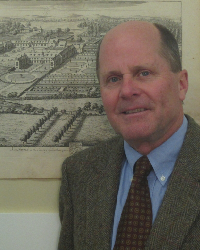

Mark D. Koch
Race Gender: 


In [208]:
count = data_labeling(dartmouth, count)

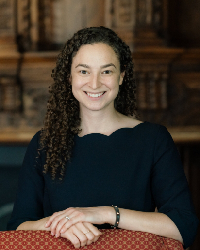

Elizabeth A. Kassler-Taub
Race Gender: 


In [292]:
count = data_labeling_3_names(dartmouth, count)

In [294]:
with open(sys.path[0] + '/../data/dartmouth/dartmouth_w_profiles_labeled.json', 'w') as f:
    json.dump(dartmouth, f)

# Yale

In [211]:
yale = get_school_json_2('yale')

In [293]:
count = 0

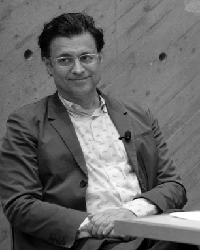

Sunil Bald
Race Gender: 


In [219]:
count = data_labeling(yale, count)

In [303]:
count = data_labeling_3_names(yale, count)

In [304]:
with open(sys.path[0] + '/../data/yale/yale_w_profiles_labeled.json', 'w') as f:
    json.dump(yale, f)

# Princeton

In [222]:
princeton = get_school_json_2('princeton')

In [298]:
count = 0

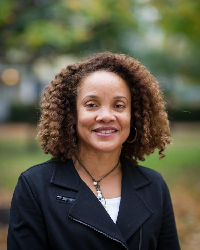

Tera W. Hunter
Race Gender: bf


In [233]:
count = data_labeling(princeton, count)

In [306]:
count = data_labeling_3_names(princeton, count)

In [307]:
with open(sys.path[0] + '/../data/princeton/princeton_w_profiles_labeled.json', 'w') as f:
    json.dump(princeton, f)

# Brown

In [236]:
brown = get_school_json_2('brown')

In [308]:
count = 0

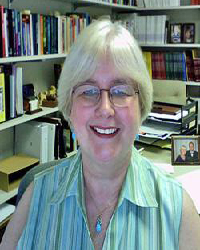

Kathryn Spoehr
Race Gender: 


In [244]:
count = data_labeling(brown, count)

In [317]:
count = data_labeling_3_names(brown, count)

In [318]:
with open(sys.path[0] + '/../data/brown/brown_w_profiles_labeled.json', 'w') as f:
    json.dump(brown, f)

# Cornell

In [247]:
cornell = get_school_json_2('cornell')

In [319]:
count = 0

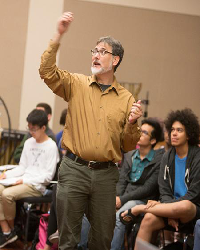

Kevin Ernste
Race Gender: 


In [256]:
count = data_labeling(cornell, count)

In [322]:
count = data_labeling_3_names(cornell, count)

In [323]:
with open(sys.path[0] + '/../data/cornell/cornell_w_profiles_labeled.json', 'w') as f:
    json.dump(cornell, f)

# UPenn

In [259]:
upenn = get_school_json_2('upenn')

In [324]:
count = 0

In [267]:
count = data_labeling(upenn, count)

In [326]:
count = data_labeling_3_names(upenn, count)

In [330]:
with open(sys.path[0] + '/../data/upenn/upenn_w_profiles_labeled.json', 'w') as f:
    json.dump(upenn, f)

# Harvard

In [270]:
Harvard = get_school_json_2('harvard')

In [328]:
count = 0

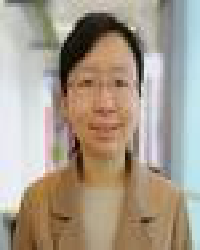

Tracy Ke
Race Gender: af


In [276]:
count = data_labeling(harvard, count)

In [333]:
count = data_labeling_3_names(harvard, count)

In [334]:
with open(sys.path[0] + '/../data/harvard/harvard_w_profiles_labeled.json', 'w') as f:
    json.dump(harvard, f)

# Final summary

In [335]:
num_profiles = 0
races = {}
genders = {}
for school in schools:
    num_profiles_school = 0
    the_school = get_school_json_2(school)
    for department in the_school:
        if 'labeled' in department.keys() and department.get('profiles') is not None:
            for prof in department.get('profiles'):
                if 'race_labeled' in prof.keys():
                    num_profiles_school += 1
                    
                    race = prof.get('race_labeled')
                    if race in races.keys():
                        races.update({race: races.get(race) + 1})
                    else:
                        races.update({race: 1})
                    
                    gender = prof.get('gender_labeled')
                    if gender in genders.keys():
                        genders.update({gender: genders.get(gender) + 1})
                    else:
                        genders.update({gender: 1})
    print(f"{school}: {num_profiles_school} profiles")
    num_profiles += num_profiles_school

columbia: 140 profiles
dartmouth: 115 profiles
yale: 135 profiles
princeton: 122 profiles
brown: 117 profiles
cornell: 150 profiles
upenn: 155 profiles
harvard: 130 profiles


In [336]:
num_profiles

1064

In [337]:
races

{'black': 142, 'white': 642, 'api': 227, 'hispanic': 48, 'unknown': 5}

In [338]:
genders

{'female': 415, 'male': 647, 'unknown': 2}